In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [55]:
data20 = pd.read_csv('C:/Users/adity/Downloads/queens20.csv')
data19 = pd.read_csv('C:/Users/adity/Downloads/queens19.csv')
data20 = data20[['Date','Daily Mean PM2.5 Concentration']]
data19 = data19[['Date','Daily Mean PM2.5 Concentration']]

In [56]:
def date_index(data):
    import datetime
    Date = []
    for i in data.Date:
        temp = i.split('/')
        Date.append(datetime.datetime(int(temp[2]),int(temp[0]),int(temp[1])))
    data['date'] = Date
    data.drop(columns=['Date'],inplace = True)
    data.set_index('date', inplace=True)
    data = data.sort_index()
#     data = data.replace(" ", np.nan)
#     data.drop(data.tail(1).index,inplace=True)
#     data.drop(datetime.datetime(2020, 2, 29),inplace=True)
    return data
data19 = date_index(data19)
data20 = date_index(data20)
data20.drop(datetime.datetime(2020, 2, 29),inplace=True)

In [57]:
data19.columns = ['pm25']
data20.columns = ['pm25']

In [58]:
print(data19.isna().sum(), data19.isna().sum())

pm25    0
dtype: int64 pm25    0
dtype: int64


In [59]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 6)})

Mean PM 2.5 concentration in year 2019 is pm25    6.047059
dtype: float64
Mean PM 2.5 concentration in year 2020 is pm25    3.996078
dtype: float64


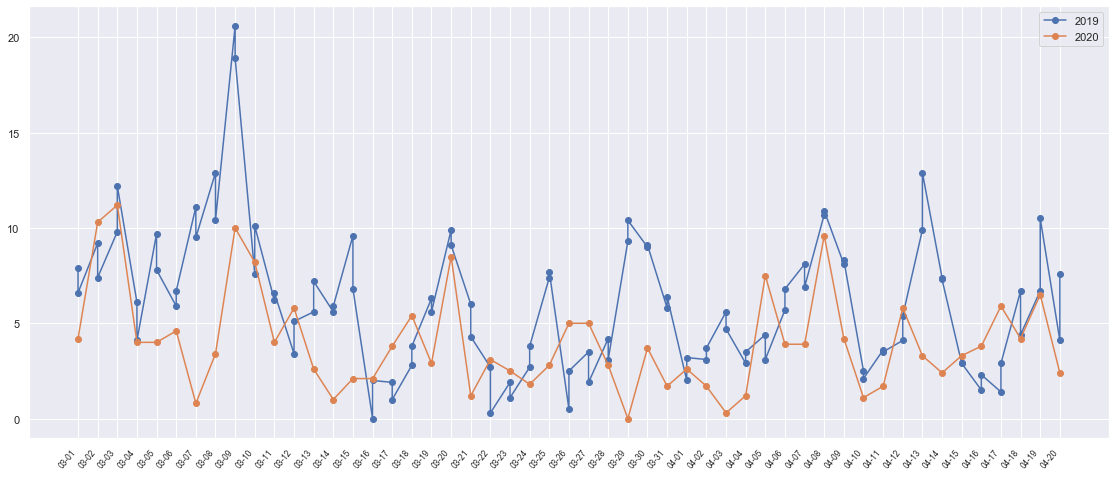

In [69]:
def compare(year,start_date,end_date,data):
    fig = plt.figure()
    fig.autofmt_xdate()
    ax = fig.add_axes([0,0,1,1])
    plt.setp(ax.get_xticklabels(), rotation=50, horizontalalignment='right', fontsize='x-small')
    
    for i in range(len(data)):
        temp_data = data[i].loc[f'{year[i]}-{start_date}':f'{year[i]}-{end_date}']
        print(f'Mean PM 2.5 concentration in year {year[i]} is',temp_data.mean())
        temp_data.index = temp_data.index.strftime('%m-%d')
        ax.plot(temp_data['pm25'], marker='o', linestyle='-', label=f'{year[i]}')
    ax.legend()
compare(['2019','2020'],'03','04-20',[data19,data20])